# Анализ данных о диабете

## Оглавление
4. [Задание 4. Загрузка и исследование данных](#Задание-4-Загрузка-и-исследование-данных)
5. [Задание 5. Корреляционный анализ](#Задание-5-Корреляционный-анализ)
6. [Задание 6. Подготовка данных для обучения моделей](#Задание-6-Подготовка-данных-для-обучения-моделей)
7. [Задание 7. Задание 7. Построение и оценка базовой модели логистической регрессии](#Задание-7-Построение-и-оценка-базовой-модели-логистической-регрессии)

## Задание 4. Загрузка и исследование данных

In [502]:
# Импорт необходимых библиотек
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns  

# Загрузка данных в переменную
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head()

diabetes_data.info()

diabetes_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


768- ненулевых значений, типы данных - int, float

In [503]:
# Считаем количество пропусков в каждом столбце
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Аномалии: Нули в Glucose, BloodPressure, SkinThickness, Insulin, BMI — это нереальные значения. Вероятно, пропуски данных были заменены на 0.

Необходимо заменить нули на пропуски (Nan)

In [504]:
medical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[medical_columns] = diabetes_data[medical_columns].replace(0, np.nan)

In [505]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Теперь данные обработаны и готовы к анализу

## Задание 5. Корреляционный анализ

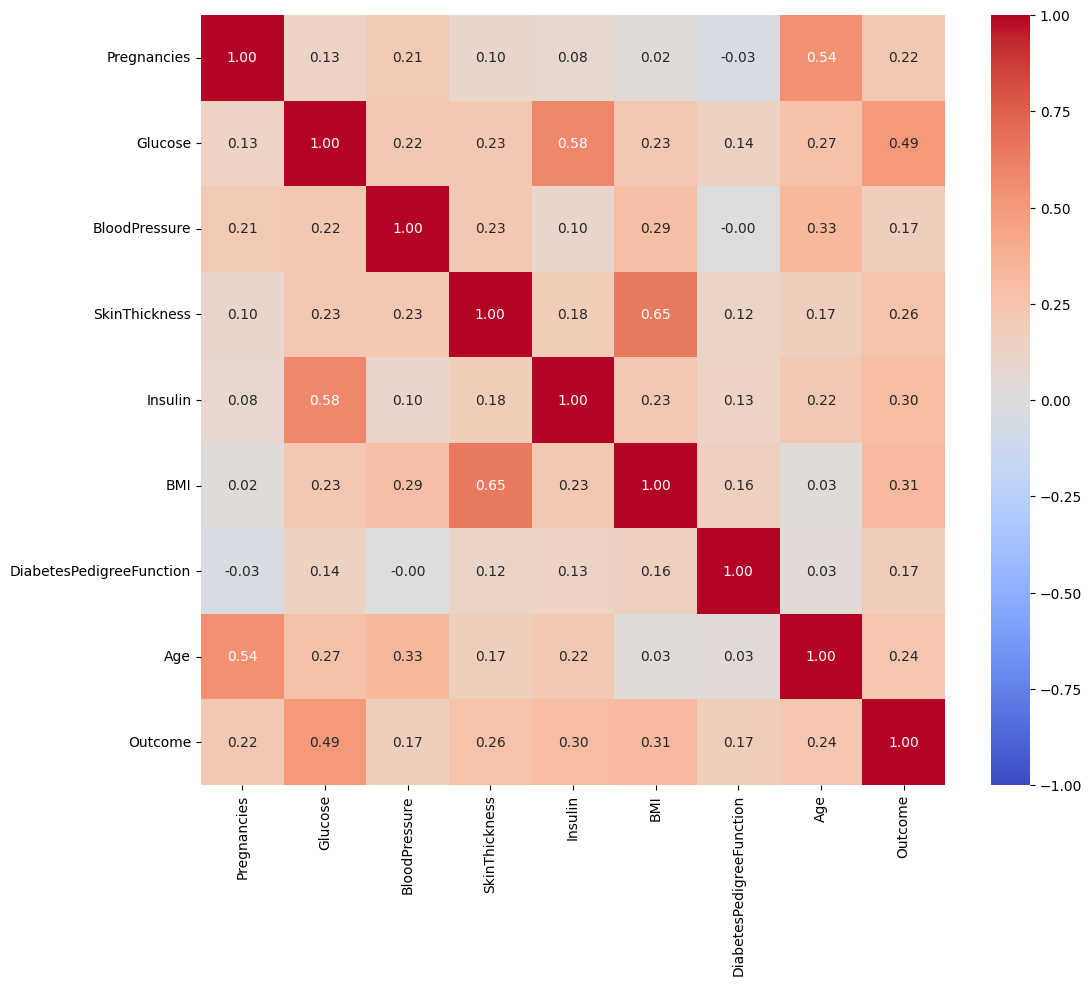

In [506]:
## Тепловая карта корреляций между числовыми признаками

# Выбираем только числовые колонки
numeric_columns = diabetes_data.select_dtypes(include=['int64', 'float64']).columns

# Создаем матрицу корреляций
correlation_matrix = diabetes_data[numeric_columns].corr()
plt.figure(figsize=(12, 10))

# Строим тепловую карту с аннотациями
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",   # (2 знака после запятой)
    cmap='coolwarm',  # Цветовая схема
    vmax= 1, vmin= -1
)

Наиболее значимые корреляции с целевым признаком (Outcome):
Glucose (0.49) - самая сильная положительная корреляция
Insulin (0.30)
BMI (0.31)

Сильные межпризнаковые корреляции (|r| > 0.5):
SkinThickness ↔ BMI (0.65) - очень сильная связь

Glucose ↔ Insulin (0.58)

Age ↔ Pregnancies (0.54)

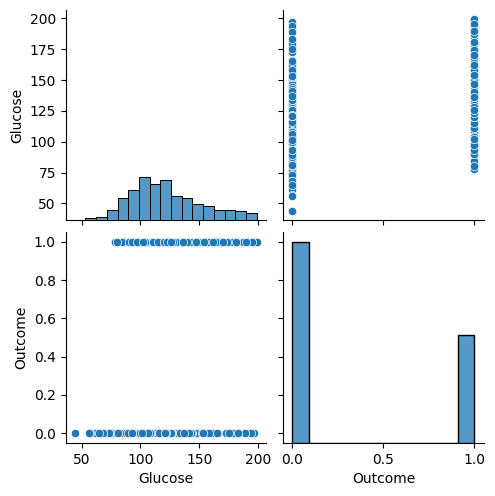

In [507]:
sns.pairplot(data=diabetes_data[['Glucose', 'Outcome']])
plt.show()

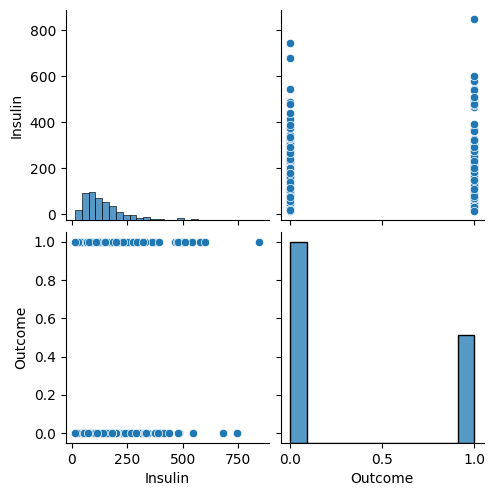

In [508]:
sns.pairplot(data=diabetes_data[['Insulin', 'Outcome']])
plt.show()

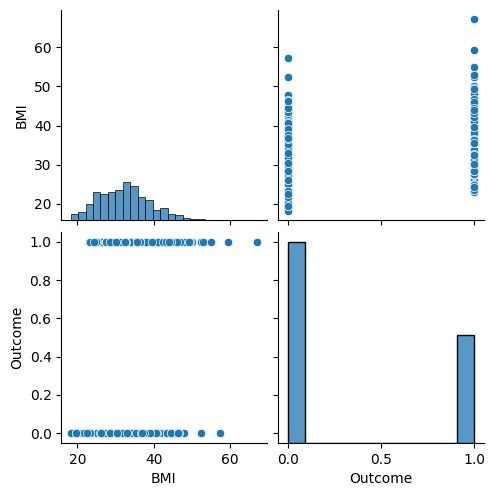

In [509]:
sns.pairplot(data=diabetes_data[['BMI', 'Outcome']])
plt.show()

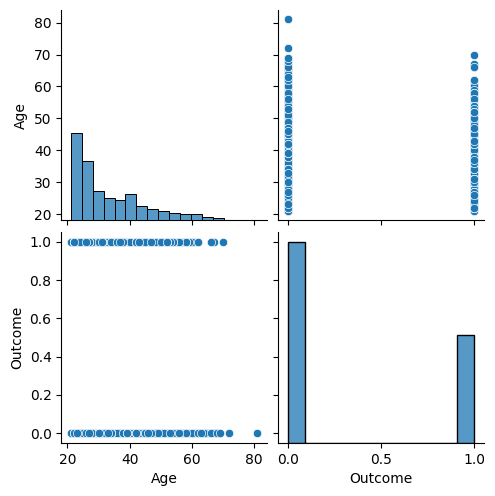

In [510]:
sns.pairplot(data=diabetes_data[['Age', 'Outcome']])
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

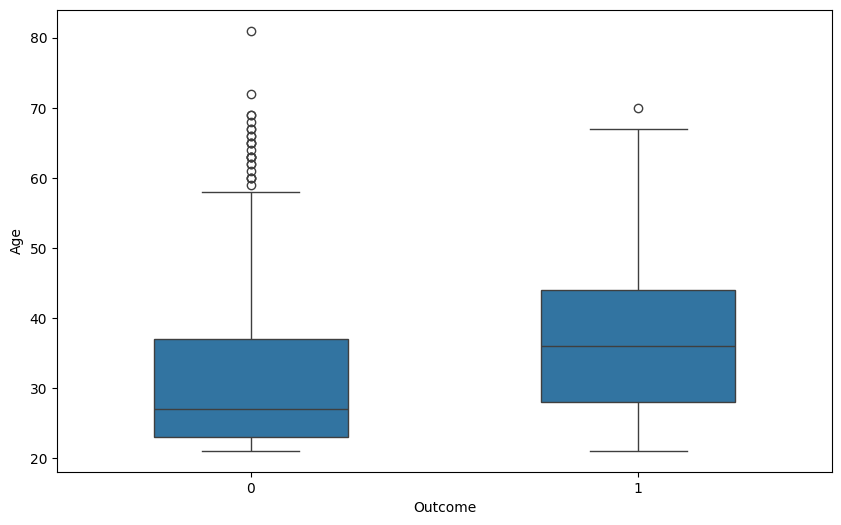

In [511]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, x='Outcome',     y='Age' ,      width=0.5   )

Распределение возрастов:

Общий диапазон: от ~20 до 80 лет

Пиковая плотность в районе 30-40 лет (судя по вертикальной концентрации точек)

Зависимость Outcome от Age:

Четкий тренд: с возрастом вероятность диабета (Outcome=1) увеличивается

У пациентов <30 лет Outcome преимущественно 0

После 40-50 лет заметен рост доли случаев Outcome=1

После 60 лет значительная часть пациентов с диабетом

<Axes: xlabel='Outcome', ylabel='Glucose'>

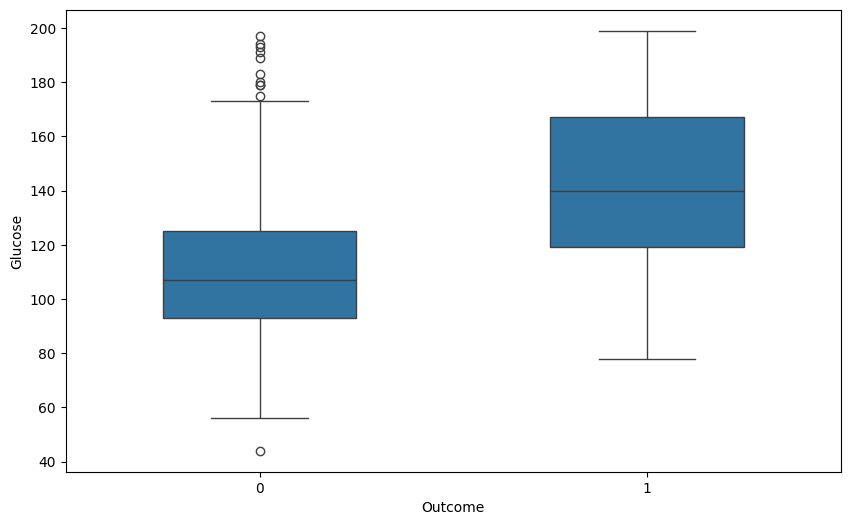

In [512]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, x='Outcome',     y='Glucose' ,      width=0.5   )

Распределение Glucose:

Для здоровых (Outcome=0):

Медиана ~100-110 mg/dL

IQR примерно 90-125 mg/dL

Для диабетиков (Outcome=1):

Медиана ~140-150 mg/dL

IQR примерно 120-170 mg/dL

Есть много выбросов >180 mg/dL

<Axes: xlabel='Outcome', ylabel='Insulin'>

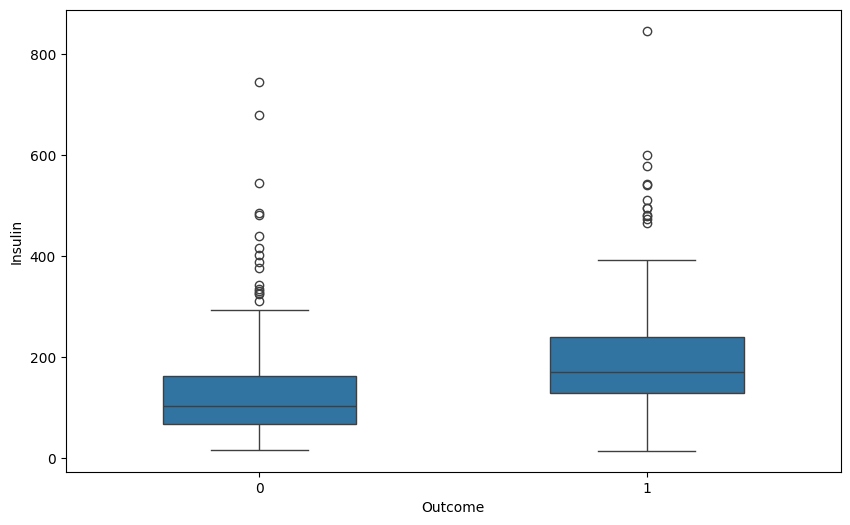

In [513]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, x='Outcome',     y='Insulin' ,      width=0.5   )

наблюдается много выбросов в обеих группах, у диабетиков смещена медиана в связи с различной чувствительностью к инсулину

<Axes: xlabel='Outcome', ylabel='BMI'>

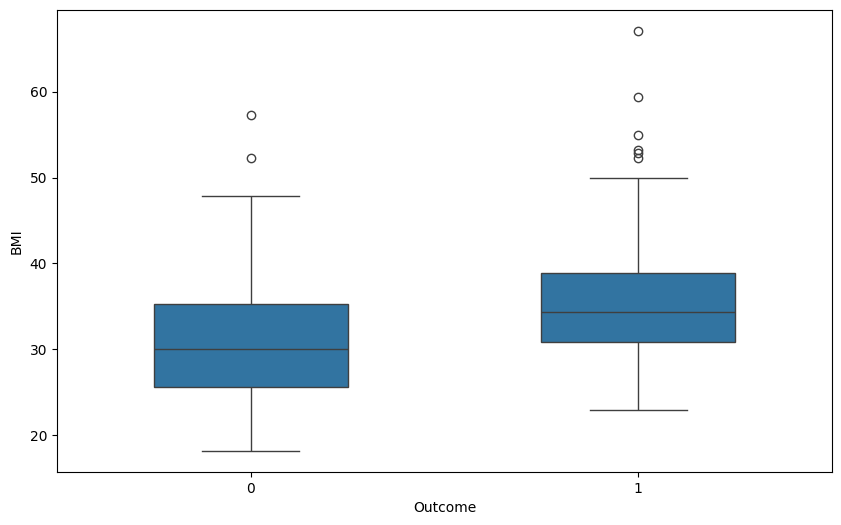

In [514]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, x='Outcome',     y='BMI' ,      width=0.5   )

у диабетиков BMI выше, минимум BMI у людей с диабетом 25

Выводы по корреляционному анализу с Outcome.

Сильная связь:
- Glucose 0.49 (высоеий уровень глюкозы => диабет), 
- BMI 0.31 и Insulin 0.30 (ожирение и инсулинорезистентность важны)

Слабая связь:
- Age, Pregnancies , SkinThickness - слабо коррелируют
- BloodPressure , DiabetesPedigreeFunction - минимальный вклад

## Задание 6. Подготовка данных для обучения моделей

In [515]:
# Разделение данных на признаки (X) и целевую переменную (y)

X = diabetes_data.drop('Outcome', axis=1)  # Все колонки, кроме 'Outcome'  
y = diabetes_data['Outcome']              # Только колонка 'Outcome'  

In [ ]:
pip install scikit-learn

In [517]:
# Разделение данных на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split  

# Разделяем данные (70% - обучение, 30% - тест)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# Проверяем баланс классов  
print("Распределение в обучающей выборке:\n", y_train.value_counts())  
print("\nРаспределение в тестовой выборке:\n", y_test.value_counts())  

Распределение в обучающей выборке:
 Outcome
0    349
1    188
Name: count, dtype: int64

Распределение в тестовой выборке:
 Outcome
0    151
1     80
Name: count, dtype: int64


In [518]:
y_train.describe()

count    537.000000
mean       0.350093
std        0.477444
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [519]:
y_test.describe()

count    231.00000
mean       0.34632
std        0.47683
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: Outcome, dtype: float64

Проверка баланса классов
Соотношение здоровых/больных в обучающей выборке:
349/188≈1.86 (на 1 пациента с диабетом приходится ~1.86 здоровых, 65% на 35%)

В тестовой выборке:
151/80≈1.89

Это означает, что данные примерно сбалансированы (соотношение сохранилось в обеих выборках), следовательно по таким данным можно обучать модель.

In [520]:
# Масштабирование признаков

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

# Масштабируем обучающие данные  
X_train_scaled = scaler.fit_transform(X_train)  

# Масштабируем тестовые данные (используем те же параметры, что и для обучающих)  
X_test_scaled = scaler.transform(X_test)  

# Проверяем результат (выводим первые 5 строк)
print("Масштабированные обучающие данные:\n", X_train_scaled[:5])
print("\nМасштабированные тестовые данные:\n", X_test_scaled[:5])

Масштабированные обучающие данные:
 [[-0.8362943  -0.89201849 -0.98600777 -1.06226679 -0.82132575 -1.19817632
  -0.61421636 -0.94861028]
 [ 0.39072767 -0.56145716 -0.01943715  0.03516577  1.43169455  0.66142904
  -0.90973787 -0.43466673]
 [-1.14304979  0.4302268  -0.34162736  1.33213152  0.79882368  1.4338805
  -0.30699103 -0.77729576]
 [ 0.08397217  0.29800228 -0.34162736 -0.762967    0.0900083   0.11785209
  -0.90681191 -0.43466673]
 [-0.8362943  -0.62756943 -3.40243431  0.93306514 -0.61036879  1.57692706
  -0.83951493 -0.00638043]]

Масштабированные тестовые данные:
 [[ 0.69748316 -0.79285009 -1.14710287  0.43423216  0.29252698  0.246594
  -0.11680393  0.85019217]
 [-0.52953881 -0.33006424  0.2222055   0.33446556         nan  0.48977316
  -0.94192338 -1.03426754]
 [-0.52953881 -0.46228877 -0.66381756         nan         nan -0.21115502
  -0.91266382 -1.03426754]
 [ 1.31099414 -0.4953449   0.62494326         nan         nan -1.09804373
   1.12965312  0.07927683]
 [ 1.00423865  0.4632

In [521]:
#тк есть пустые значения Nan, то нам нужно их заполнить. 
# Он использует метод k-ближайших соседей (K-Nearest Neighbors), чтобы предсказать, какое значение должно быть на месте пропуска.

from sklearn.impute import KNNImputer

# Создаем KNNImputer 
imputer = KNNImputer(n_neighbors=3)

# Заполняем пропуски в обучающих и тестовых данных
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.fit_transform(X_test_scaled)


## Задание 7. Построение и оценка базовой модели логистической регрессии

In [522]:
from sklearn.linear_model import LogisticRegression

# Создаём модель
model = LogisticRegression(random_state=42)

# Обучаем на обучающих данных
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [523]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Оценка точности (сколько верно угадала диагнозов)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Точность (сколько действительно больны, остальное - ложные срабатывания)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Полнота (сколько модель нашла больных)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 - среднее качество между точностью и полнотой
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# Roc-auc : Оценивает, насколько хорошо модель отделяет больных (1) от здоровых (0) по вероятностям.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.74
Precision: 0.63
Recall: 0.60
F1-score: 0.62
ROC-AUC: 0.80


Почему это важно для задачи про диабет:
Accuracy — общая точность, но не учитывает дисбаланс классов.

Precision — важно минимизировать ложные диагнозы (чтобы не пугать здоровых).

Recall — важно найти всех больных (пропуск опасен для жизни).

F1 — баланс между ложными срабатываниями и пропущенными случаями.

ROC-AUC — показывает, насколько модель уверена в предсказаниях.

## Задание 8. Использование модели

In [524]:
# Анализ коэффициентов модели
feature_names = X_train.columns
coefficients = model.coef_[0]

coef_df = pd. DataFrame ( {
    'Feature': feature_names,
    'Coefficient': coefficients,
})

print(coef_df)

                    Feature  Coefficient
0               Pregnancies     0.189599
1                   Glucose     1.165077
2             BloodPressure    -0.106692
3             SkinThickness     0.094368
4                   Insulin     0.022317
5                       BMI     0.694548
6  DiabetesPedigreeFunction     0.109580
7                       Age     0.377149


самый значимый - 1. Glucose , тк высокий уровень глюкозы один из главных признаков диабета.
2. BMI - ожирение увеличивает риск диабета второго типа.
3. Pregnancies - мало значимо, но гестационный диабет может повлиять на общую картину.
4. Age - с возрастом риск диабета увеличивается.
5. Остальные малозначимы
BloodPressure - отрицательный, возможно из за пропущенных значений или корреляции с другими признаками.


In [525]:
# Функция для предсказания диабета

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, pedigree_func, age):
    # Создаем DataFrame из входных данных
    patient_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [pedigree_func],
        'Age': [age]
    })
    
    # Масштабируем данные (используем ранее обученный scaler)
    patient_scaled = scaler.transform(patient_data)
    
    # Предсказываем вероятность диабета
    proba = model.predict_proba(patient_scaled)[0][1]  # Вероятность класса 1 (диабет)
    
    # Формируем понятный вывод
    if proba >= 0.5:
        diagnosis = "Высокий риск диабета (вероятность {:.1%})".format(proba)
    else:
        diagnosis = "Низкий риск диабета (вероятность {:.1%})".format(proba)
    
    return diagnosis

In [526]:
# Пример

result = predict_diabetes(
    pregnancies=1,
    glucose=160,
    blood_pressure=70,
    skin_thickness=30,
    insulin=100,
    bmi=35,
    pedigree_func=0.5,
    age=50
)

print(result)

Высокий риск диабета (вероятность 78.1%)


## Бонусное задание 9. Подбор гиперпараметров с использованием Grid Search

In [527]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Сила регуляризации
    'penalty': ['l1', 'l2'],                # Тип регуляризации
    'solver': ['liblinear']                 # Решатель для L1/L2
}

In [528]:

# Настраиваем GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # Оптимизируем по ROC-AUC
    cv=5,               # 5-кратная кросс-валидация
    verbose=1           # Вывод логов
)

# Запускаем поиск
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [529]:
# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Оценка качества
from sklearn.metrics import roc_auc_score, accuracy_score

print(f"ROC-AUC:, {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Accuracy:, {accuracy_score(y_test, y_pred):.4f}")

ROC-AUC:, 0.7945
Accuracy:, 0.7403


Показатели модели после GridSearch не улучшились, что возможно говорит об уже хорошо подобранной модели , либо логистическая регрессия уже себя исчерпала.